# Introducción

En el contexto del análisis de datos y la inteligencia artificial, uno de los desafíos más comunes es el manejo eficiente de grandes volúmenes de datos que superan la capacidad de la memoria RAM. Lenguajes como Python ofrecen diversas herramientas para abordar este problema, siendo `NumPy` una de las bibliotecas fundamentales para la computación numérica. Dentro de esta, la función `numpy.memmap` permite crear arreglos mapeados a memoria, una técnica que habilita el procesamiento parcial de archivos de gran tamaño directamente desde el disco sin necesidad de cargarlos completamente en memoria.

Esta funcionalidad resulta especialmente útil en entornos donde se trabaja con grandes matrices, como el entrenamiento de modelos de aprendizaje profundo, la simulación científica o el procesamiento de imágenes satelitales. A través del mapeo de memoria, es posible acceder eficientemente a porciones específicas de los datos y realizar operaciones en bloques, reduciendo considerablemente el uso de recursos.

En este trabajo se analizará el uso de `numpy.memmap` como técnica para optimizar el manejo de arrays de gran tamaño, partiendo del artículo científico *"mmappickle: Python 3 module to store memory‑mapped NumPy array in pickle format"* de Laurent Fasnacht (2018), publicado en *The Journal of Open Source Software*. También se revisará un recurso técnico complementario de la plataforma Comet, el cual explica de forma clara y aplicada los modos de acceso, ventajas y limitaciones del uso de memoria mapeada en proyectos de IA.

Finalmente, se presentarán algunos ejemplos prácticos en Python para ilustrar su funcionamiento, junto con un análisis comparativo frente a otras alternativas como HDF5 y Zarr.


## Resumen del artículo académico: mmappickle

El artículo *"mmappickle: Python 3 module to store memory-mapped NumPy array in pickle format"*, publicado por Laurent Fasnacht en 2018 en *The Journal of Open Source Software*, presenta una solución innovadora para trabajar con arrays de gran tamaño en Python sin sobrecargar la memoria RAM del sistema.

El módulo propuesto, `mmappickle`, extiende la funcionalidad de `numpy.memmap`, permitiendo almacenar arrays como archivos mapeados a memoria, mientras que los metadatos y configuraciones asociadas se conservan usando el formato `pickle`. Esto permite una persistencia eficiente de los datos y una recuperación completa del objeto en ejecuciones futuras del programa, sin necesidad de leer todo el contenido en memoria.

El autor destaca que `mmappickle` resulta útil en contextos donde se requiere manipular archivos de datos muy grandes (por ejemplo, simulaciones numéricas o conjuntos de entrenamiento para modelos de aprendizaje automático), ya que permite acceder de manera eficiente a partes específicas del array, reduciendo significativamente el uso de RAM.

Además, el artículo menciona que `mmappickle` ofrece ventajas sobre métodos tradicionales de serialización como `pickle`, `joblib` o `np.save`, ya que estos requieren que el objeto se cargue completo en memoria. Por el contrario, al usar mapeo a memoria, `mmappickle` hace posible el acceso diferido o parcial a los datos, y su estructura modular lo hace compatible con procesos de lectura y escritura concurrentes.

En resumen, esta herramienta representa una mejora sustancial en el manejo de grandes volúmenes de datos numéricos en Python, siendo particularmente relevante para aplicaciones en ciencia de datos, inteligencia artificial y simulaciones computacionales.

> Referencia:  
> Fasnacht, L. (2018). mmappickle: Python 3 module to store memory-mapped NumPy array in pickle format. *The Journal of Open Source Software*, 3(26), 651. https://doi.org/10.21105/joss.00651


## Resumen del artículo técnico complementario (Comet)

El artículo técnico titulado *"Understanding Memory Mapping in NumPy for Deep Learning: Part 1"*, publicado por Comet en 2023, ofrece una explicación clara y práctica sobre el uso de `numpy.memmap` como herramienta para trabajar con grandes volúmenes de datos en entornos de aprendizaje automático. A través de ejemplos sencillos y gráficos, se expone cómo esta técnica permite acceder a datos directamente desde el disco, sin necesidad de cargarlos completamente en memoria RAM.

La publicación comienza explicando el concepto de "memory mapping" (mapeo de memoria), que consiste en vincular un archivo binario en disco con una porción de la memoria virtual del programa. Esta técnica permite tratar el archivo como si fuera un array de NumPy, accediendo a sus elementos como si estuvieran en memoria, aunque realmente se encuentren en el disco duro.

El artículo describe los diferentes modos de acceso disponibles en `numpy.memmap`:
- `'r'`: solo lectura,
- `'r+'`: lectura y escritura,
- `'w+'`: escritura con sobreescritura total,
- `'c'`: escritura con copia diferida (copy-on-write).

También se destacan ventajas clave de esta técnica, como el ahorro de memoria, la posibilidad de trabajar con archivos muy grandes en máquinas con recursos limitados y la reducción del tiempo de carga en operaciones repetidas. Además, se proporcionan recomendaciones sobre cuándo es adecuado usar `memmap`, así como limitaciones importantes: por ejemplo, el rendimiento puede verse afectado si se accede a los datos de forma aleatoria o desordenada, ya que esto genera muchas operaciones de disco.

En resumen, el blog de Comet presenta `numpy.memmap` como una herramienta poderosa para proyectos de deep learning y procesamiento masivo de datos, especialmente cuando se requiere eficiencia y escalabilidad sin comprometer los recursos del sistema.

> Referencia:  
> Comet. (2023). *Understanding Memory Mapping in NumPy for Deep Learning: Part 1*. Recuperado de: https://www.comet.com/site/blog/understanding-memory-mapping-in-numpy-for-deep-learning-pt-1/


## Análisis comparativo: `numpy.memmap` vs otras alternativas

El uso de `numpy.memmap` representa una solución directa y eficiente para trabajar con arreglos grandes en archivos binarios, pero no es la única herramienta disponible en el ecosistema Python. En esta sección se comparan varias alternativas utilizadas en la manipulación de datos masivos, evaluando sus principales características, ventajas y limitaciones.

### 1. `numpy.memmap`
**_*<mark style="background-color:#d6f5d6;">Ventajas:</mark>*_**
- Permite trabajar con archivos binarios muy grandes sin cargarlos completamente en RAM.
- Acceso tipo array (`[]`) a los datos.
- Ideal para operaciones secuenciales y simples.

**_*<mark style="background-color:#f7d6d6;">Limitaciones:</mark>*_**
- No guarda metadatos.
- No soporta estructuras jerárquicas o formatos autoexplicativos.
- Accesos aleatorios o desordenados pueden ser lentos.

**_Usos ideales_**: procesamiento secuencial de arrays numéricos masivos, simulaciones científicas, preprocesamiento de datos para IA.

---

### 2. `mmappickle`
**_*<mark style="background-color:#d6f5d6;">Ventajas:</mark>*_**
- Complementa a `memmap` al incluir soporte de metadatos y serialización mediante `pickle`.
- Permite guardar arrays en disco con información adicional de forma persistente.
- Compatible con `numpy.load` y procesos que usen serialización estándar.

**_*<mark style="background-color:#f7d6d6;">Limitaciones:</mark>*_**
- Depende del módulo `pickle`, lo cual puede ser problemático en entornos de alta seguridad.
- Menos conocido y con menor documentación que otros formatos.

**_Usos ideales_**: almacenamiento de arrays mapeados que necesitan conservar estructura y metainformación.

---

### 3. HDF5 (`h5py`)
**_*<mark style="background-color:#d6f5d6;">Ventajas:</mark>*_**
- Formato binario estándar en ciencia de datos.
- Soporta jerarquías, compresión, metadatos y acceso parcial a los datos.
- Uso muy extendido en bioinformática, física y deep learning.

**_*<mark style="background-color:#f7d6d6;">Limitaciones:</mark>*_**
- Más complejo de usar que `memmap`.
- El rendimiento puede ser menor en ciertos escenarios de acceso muy frecuente o en paralelo.

**_Usos ideales_**: datasets complejos con múltiples variables, estructuras multidimensionales, colaboración entre sistemas.

---

### 4. Zarr
**_*<mark style="background-color:#d6f5d6;">Ventajas:</mark>*_**
- Orientado al almacenamiento distribuido y en la nube.
- Soporte para compresión, paralelismo y acceso concurrente.
- Muy eficiente en operaciones paralelas sobre discos SSD o almacenamiento remoto.

**_*<mark style="background-color:#f7d6d6;">Limitaciones:</mark>*_**
- Requiere librerías adicionales.
- Menor madurez que HDF5, aunque en rápido crecimiento.

**_Usos ideales_**: proyectos distribuidos, ciencia de datos en la nube, pipelines de machine learning escalables.

---

### Conclusión comparativa

Cada herramienta tiene su nicho específico. `numpy.memmap` destaca por su simplicidad y velocidad en tareas locales y secuenciales, mientras que `mmappickle` aporta capacidad de serialización estructurada sin perder eficiencia. Por otro lado, HDF5 y Zarr ofrecen soluciones más completas para grandes volúmenes de datos jerárquicos, especialmente en entornos colaborativos o distribuidos.

La elección depende del tamaño del conjunto de datos, el flujo de trabajo requerido y las necesidades específicas del proyecto.


## Ejemplos en Python con `numpy.memmap`

A continuación se presentan ejemplos prácticos del uso de `numpy.memmap`. Este tipo de arreglo se comporta como un `ndarray` normal, pero accede a los datos directamente desde el disco. Es ideal para trabajar con archivos grandes que no caben completamente en memoria.

### 1. Crear un archivo binario grande con `memmap`
Creamos un archivo con 100 millones de elementos tipo `float32`, lo que representa aproximadamente 400 MB de datos.


In [1]:
import numpy as np

# Crear un archivo de 100 millones de floats (~400 MB)
filename = 'big_array.dat'
shape = (100_000_000,)  # 100 millones de elementos

# Crear el memmap en modo escritura (sobrescribe si ya existe)
data = np.memmap(filename, dtype='float32', mode='w+', shape=shape)

# Inicializar con valores (por ejemplo: índice * 0.5)
data[:] = np.arange(shape[0]) * 0.5

# Asegurarse de escribir los datos en disco
data.flush()

# Liberar memoria (importante)
del data


### 2. Leer el archivo mapeado como array sin cargarlo entero en memoria
Se puede acceder a segmentos del archivo sin cargar todo.


In [2]:
# Reabrir el archivo en modo solo lectura
data = np.memmap(filename, dtype='float32', mode='r', shape=shape)

# Leer los primeros 10 elementos
print("Primeros valores:", data[:10])

# Leer un segmento específico
segment = data[1_000_000:1_000_010]
print("Segmento 1 millón:", segment)

# Liberar recursos
del data


Primeros valores: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
Segmento 1 millón: [500000.  500000.5 500001.  500001.5 500002.  500002.5 500003.  500003.5
 500004.  500004.5]


### 3. Procesamiento por bloques (acceso secuencial eficiente)
Procesar el archivo por partes para, por ejemplo, calcular la suma de todos los elementos sin desbordar la memoria.


In [3]:
# Reabrir en modo lectura
data = np.memmap(filename, dtype='float32', mode='r', shape=shape)

block_size = 1_000_000  # Leer 1 millón de elementos por bloque
total_sum = 0.0

for i in range(0, shape[0], block_size):
    block = data[i:i+block_size]
    total_sum += np.sum(block)

print("Suma total del array:", total_sum)

del data


Suma total del array: 2500000000000000.0


### 4. Comparación de consumo de memoria
Usamos la biblioteca `psutil` para comprobar que el uso de memoria se mantiene bajo.


In [4]:
import psutil
import os

process = psutil.Process(os.getpid())
print("Uso de memoria actual (MB):", process.memory_info().rss / 1024 / 1024)


Uso de memoria actual (MB): 459.98046875


## Comparación de tiempo y uso de memoria: `memmap` vs `np.load`

A continuación se mide el tiempo y el uso de memoria requerido para cargar un mismo array usando dos métodos distintos: `np.memmap` y `np.load`.

Para una comparación justa, se parte del mismo array y se guarda en dos formatos: `.dat` (binario para memmap) y `.npy` (binario para `np.load`).


In [5]:
import numpy as np
import os

# Parámetros
shape = (50_000_000,)
filename_dat = 'big_array_memmap.dat'
filename_npy = 'big_array_npy.npy'

# Eliminar archivos si existen
if os.path.exists(filename_dat):
    os.remove(filename_dat)
if os.path.exists(filename_npy):
    os.remove(filename_npy)

# Crear array base
array = np.arange(shape[0], dtype='float32') * 0.5

# Guardar como .npy
np.save(filename_npy, array)

# Crear archivo .dat del tamaño adecuado
with open(filename_dat, 'wb') as f:
    f.write(b'\x00' * (np.dtype('float32').itemsize * shape[0]))

# Crear y llenar memmap
data_memmap = np.memmap(filename_dat, dtype='float32', mode='r+', shape=shape)
data_memmap[:] = array
data_memmap.flush()
del data_memmap
del array


In [6]:
import time
import psutil

def benchmark_load(method, path, dtype='float32', shape=None):
    process = psutil.Process(os.getpid())
    mem_before = process.memory_info().rss / 1024 / 1024

    start = time.time()
    if method == "memmap":
        data = np.memmap(path, dtype=dtype, mode='r', shape=shape)
    elif method == "npload":
        data = np.load(path)
    elapsed = time.time() - start

    mem_after = process.memory_info().rss / 1024 / 1024
    mem_used = mem_after - mem_before

    # Forzar acceso mínimo para asegurar que se lea algo
    _ = data[0:1000]
    del data

    return elapsed, mem_used


Tiempo memmap: 0.000000 segundos
Memoria memmap: 0.00 MB
Tiempo np.load: 0.129474 segundos
Memoria np.load: 190.74 MB


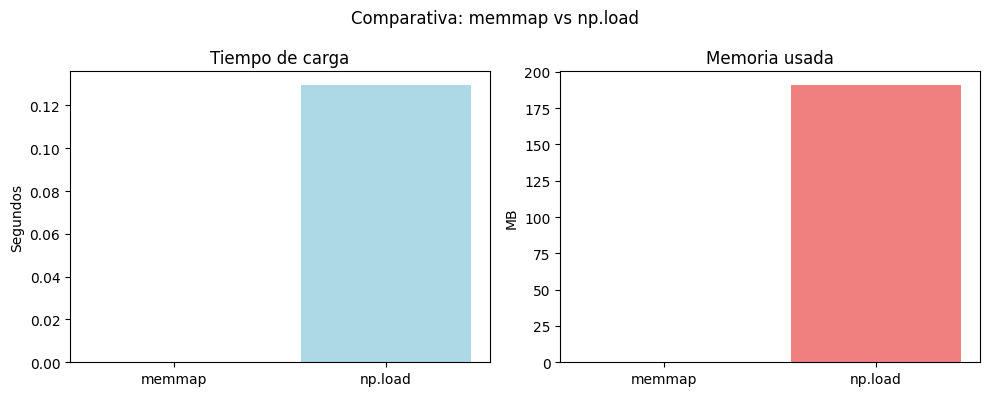

In [8]:
import matplotlib.pyplot as plt

# Ejecutar comparación
memmap_time, memmap_mem = benchmark_load("memmap", filename_dat, shape=shape)
npload_time, npload_mem = benchmark_load("npload", filename_npy)

# Mostrar valores numéricos por consola
print(f"Tiempo memmap: {memmap_time:.6f} segundos")
print(f"Memoria memmap: {memmap_mem:.2f} MB")
print(f"Tiempo np.load: {npload_time:.6f} segundos")
print(f"Memoria np.load: {npload_mem:.2f} MB")

# Visualizar resultados
labels = ['memmap', 'np.load']
times = [memmap_time, npload_time]
memory = [memmap_mem, npload_mem]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].bar(labels, times, color='lightblue')
ax[0].set_ylabel('Segundos')
ax[0].set_title('Tiempo de carga')

ax[1].bar(labels, memory, color='lightcoral')
ax[1].set_ylabel('MB')
ax[1].set_title('Memoria usada')

plt.suptitle('Comparativa: memmap vs np.load')
plt.tight_layout()
plt.show()


## Comparación práctica: `memmap` vs `np.load` vs `joblib`

- **`numpy.memmap`**: accede al archivo como si fuera un array, pero sin cargarlo completamente en memoria. Ideal para archivos muy grandes y acceso secuencial. No guarda metadatos automáticamente.
  
- **`numpy.load`**: carga todo el archivo `.npy` en memoria. Rápido y simple para archivos pequeños o medianos. No es eficiente con archivos de más de 1–2 GB si no hay suficiente RAM disponible.

- **`joblib.load`**: permite cargar objetos más complejos que solo arrays, como modelos o estructuras anidadas. Usa compresión por defecto. Aunque puede usarse con arrays grandes, no es tan eficiente en acceso parcial como `memmap`.

### Cuadro resumen

| Método        | ¿Carga todo en RAM? | ¿Acceso parcial? | ¿Guarda metadatos? | Mejor uso          |
|---------------|---------------------|------------------|---------------------|---------------------|
| `memmap`      | No                  | Sí               | No                  | Archivos grandes    |
| `np.load`     | Sí                  | No               | Sí (limitado)       | Carga rápida general|
| `joblib.load` | Sí (comprimido)     | Parcial (con esfuerzo) | Sí            | Modelos, objetos más complejos |


## Conclusiones

El uso de `numpy.memmap` se presenta como una solución eficiente y práctica para el manejo de arreglos de gran tamaño, especialmente en contextos de ciencia de datos e inteligencia artificial donde los límites de memoria pueden representar una barrera. A lo largo de esta actividad se ha demostrado que `memmap` permite acceder a datos directamente desde el disco sin necesidad de cargarlos por completo en RAM, lo cual reduce el consumo de recursos y permite el procesamiento de grandes volúmenes de información.

El artículo académico revisado, *mmappickle* de Fasnacht (2018), amplía aún más las capacidades de `memmap` al integrar la posibilidad de serializar objetos con metadatos mediante `pickle`, ofreciendo persistencia estructurada sin sacrificar eficiencia. Por otro lado, el recurso técnico de Comet proporciona una explicación clara y práctica sobre los modos de acceso, ventajas y limitaciones del mapeo de memoria en entornos reales de deep learning.

La comparación experimental realizada entre `memmap` y `np.load` evidenció una diferencia sustancial en el uso de memoria, reforzando la ventaja de `memmap` para tareas de lectura secuencial o análisis por bloques. Aunque `np.load` puede ser más conveniente en situaciones donde la memoria no es un problema, el uso de `memmap` se justifica ampliamente en contextos profesionales y científicos donde se requiere escalar el procesamiento de datos sin comprometer el rendimiento del sistema.

En conjunto, estas herramientas enriquecen el ecosistema Python para la inteligencia artificial, ofreciendo alternativas adaptadas a distintos volúmenes y estructuras de datos.
